# Pandas Expanding and Rolling

- https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.expanding.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html

  
- **Expanding** => 누적 계산 -> 누적 합계 등
- **Rolling**   => 값의 이동 -> 이동 평균 등 

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

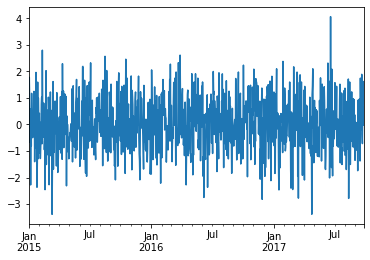

In [5]:
s = pd.Series(np.random.randn(1000),
             index=pd.date_range('1/1/2015',periods=1000))
s.plot()

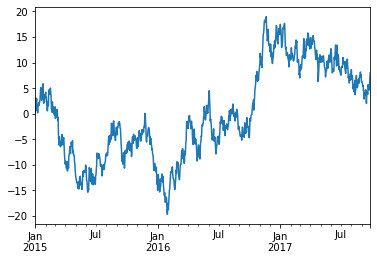

In [6]:
s = s.cumsum() #s 의 랜덤한 값들을 누적해서 더해주었다
s.plot() 

In [13]:
r = s.rolling(window = 30) #이동 평균 (Moving Average) 만들 때 사용
r.mean() #window 의 사이즈만큼 값을 이동

2015-01-01         NaN
2015-01-02         NaN
2015-01-03         NaN
2015-01-04         NaN
2015-01-05         NaN
                ...   
2017-09-22    5.175461
2017-09-23    5.151409
2017-09-24    5.093793
2017-09-25    5.074493
2017-09-26    5.100339
Freq: D, Length: 1000, dtype: float64

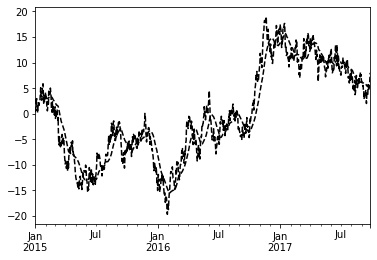

In [14]:
s.plot(style='k--') #추세선만들기
r.mean().plot(style='k--')

In [15]:
df = pd.DataFrame(np.random.randn(1000,4),
                 index = pd.date_range('1/1/2015',periods=1000),
                 columns = ['A','B','C','D']) #랜덤한 양수와 음수 데이터 프레임

In [16]:
df

,A,B,C,D
2015-01-01,-0.785969,-0.209511,1.993256,0.622469
2015-01-02,0.369042,-1.747199,-0.849190,0.066350
2015-01-03,0.015238,2.096408,0.275022,1.327383
2015-01-04,-0.796597,1.260588,-0.226466,0.363198
2015-01-05,0.244897,0.726292,1.586055,0.033470
...,...,...,...,...
2017-09-22,0.438900,-1.356210,1.364260,-1.074221
2017-09-23,1.394900,0.252938,0.816554,0.594635
2017-09-24,1.359812,-0.274842,-0.542907,-0.064754
2017-09-25,0.318046,0.026361,-0.223326,0.267958


In [18]:
df = df.cumsum()
df

,A,B,C,D
2015-01-01,-0.785969,-0.209511,1.993256,0.622469
2015-01-02,-0.416926,-1.956710,1.144066,0.688819
2015-01-03,-0.401689,0.139698,1.419088,2.016202
2015-01-04,-1.198285,1.400286,1.192622,2.379400
2015-01-05,-0.953388,2.126578,2.778677,2.412870
...,...,...,...,...
2017-09-22,4.745977,-43.555268,56.725526,27.744930
2017-09-23,6.140877,-43.302329,57.542080,28.339565
2017-09-24,7.500690,-43.577171,56.999173,28.274811
2017-09-25,7.818735,-43.550810,56.775847,28.542769


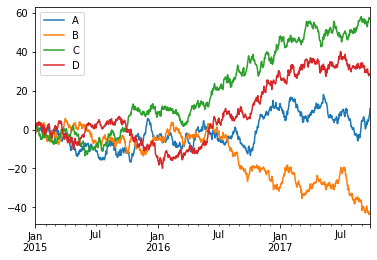

In [19]:
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000178AB791B08>,
      dtype=object)

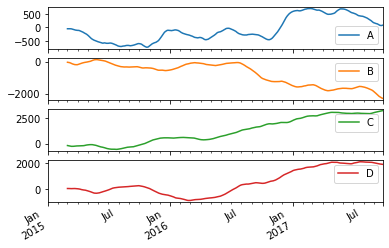

In [20]:
df.rolling(window=60).sum().plot(subplots=True) # 윈도우 사이즈 지정 -> 윈도우 사이즈 만큼 이동 평균

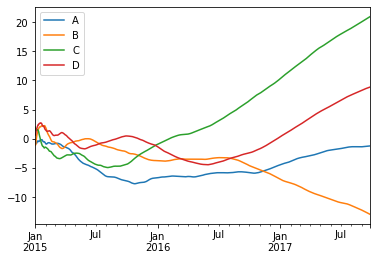

In [21]:
#Extanding 누적 평균
df.rolling(window=len(df), min_periods=1).mean().plot()

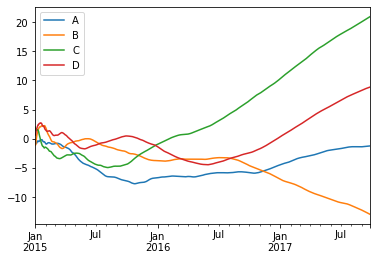

In [25]:
df.expanding(min_periods=1).mean().plot()

In [26]:
df.expanding?

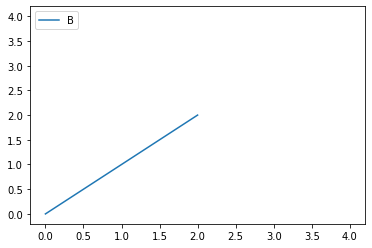

In [28]:
dfe = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]}) 
dfe.plot() #결측치가 있어서 중간에 끊긴다

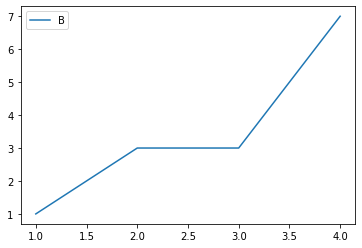

In [35]:
dfe.expanding(2).sum().plot() #누적 합계